<a href="https://colab.research.google.com/github/Tarannum-Samiha/Telecom-Churn-Analysis/blob/main/Telecom_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
df = pd.read_csv("Telecom Churn.csv")

***Churn Rate across States***



In [246]:
churn_by_state = df.groupby('state')['churn'].mean().reset_index()

In [247]:
churn_by_state.columns = ['state', 'churn_rate']

In [248]:
churn_by_state_sorted = churn_by_state.sort_values(by='churn_rate', ascending=False)

<ipython-input-249-cb77032468b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='churn_rate', data=churn_by_state_sorted, palette='viridis')


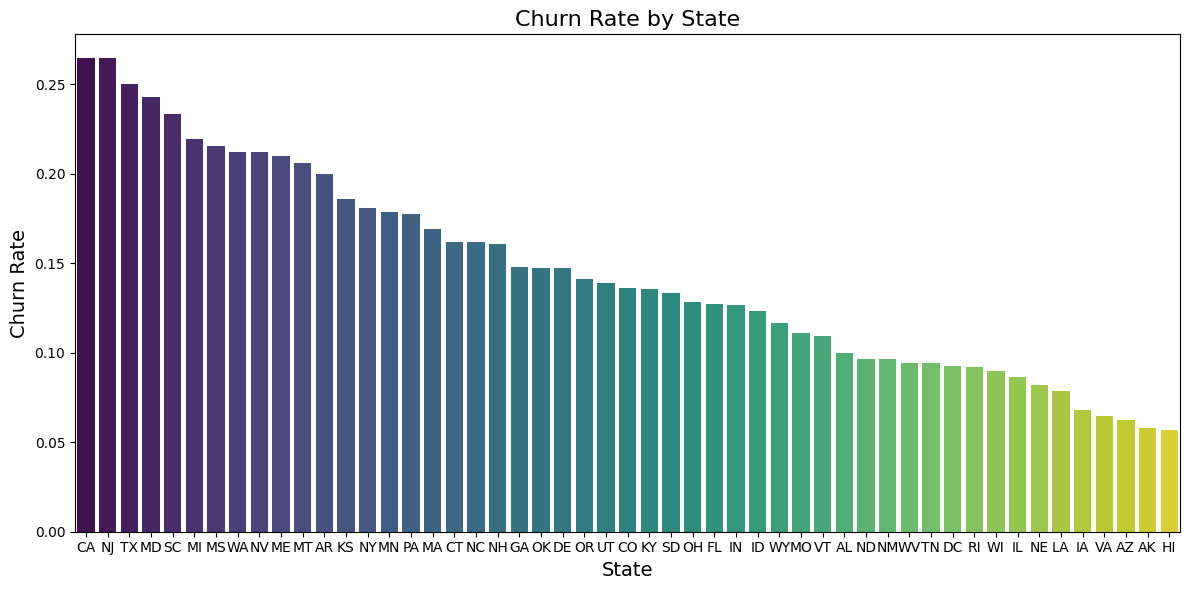

In [249]:
plt.figure(figsize=(12, 6))

sns.barplot(x='state', y='churn_rate', data=churn_by_state_sorted, palette='viridis')

plt.title('Churn Rate by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Churn Rate', fontsize=14)

plt.tight_layout()
plt.show()

***Segmentation of Customers based on their total day, evening, night, and international minutes***

In [250]:
def categorize_usage(minutes):
    if minutes <= 100:
        return 'Very Low'
    elif minutes <= 200:
        return 'Low'
    elif minutes <= 300:
        return 'Medium'
    elif minutes <= 400:
        return 'High'
    else:
        return 'Very High'

df['Day Minutes Group'] = df['total day minutes'].apply(categorize_usage)
df['Evening Minutes Group'] = df['total eve minutes'].apply(categorize_usage)
df['Night Minutes Group'] = df['total night minutes'].apply(categorize_usage)
df['Intl Minutes Group'] = df['total intl minutes'].apply(categorize_usage)

usage_groups = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

***Day Minutes Group***

<ipython-input-251-c3f780f42df9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')


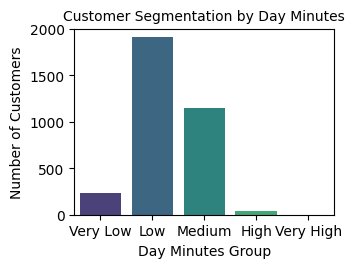

In [251]:
plt.subplot(2, 2, 1)
day_counts = df['Day Minutes Group'].value_counts().reindex(usage_groups, fill_value=0)
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.title('Customer Segmentation by Day Minutes', fontsize=10)
plt.xlabel('Day Minutes Group')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

***Evening Minutes Group***

<ipython-input-252-f1aeffe4850c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=evening_counts.index, y=evening_counts.values, palette='viridis')


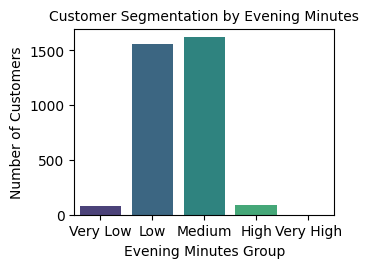

In [252]:
plt.subplot(2, 2, 2)
evening_counts = df['Evening Minutes Group'].value_counts().reindex(usage_groups, fill_value=0)
sns.barplot(x=evening_counts.index, y=evening_counts.values, palette='viridis')
plt.title('Customer Segmentation by Evening Minutes', fontsize=10)
plt.xlabel('Evening Minutes Group')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

***Night Minutes Group***

<ipython-input-253-e998334f2415>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=night_counts.index, y=night_counts.values, palette='viridis')


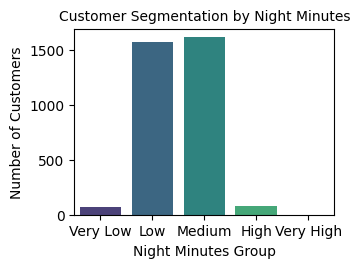

In [253]:
plt.subplot(2, 2, 3)
night_counts = df['Night Minutes Group'].value_counts().reindex(usage_groups, fill_value=0)
sns.barplot(x=night_counts.index, y=night_counts.values, palette='viridis')
plt.title('Customer Segmentation by Night Minutes', fontsize=10)
plt.xlabel('Night Minutes Group')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

***International Minutes Group***

<ipython-input-254-5de17eb0f736>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=intl_counts.index, y=intl_counts.values, palette='viridis')


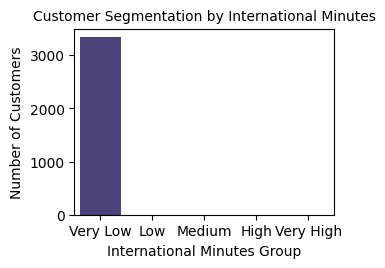

In [254]:
plt.subplot(2, 2, 4)
intl_counts = df['Intl Minutes Group'].value_counts().reindex(usage_groups, fill_value=0)
sns.barplot(x=intl_counts.index, y=intl_counts.values, palette='viridis')
plt.title('Customer Segmentation by International Minutes', fontsize=10)
plt.xlabel('International Minutes Group')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

***Customer Churn Probability Based on International Plan and Voice Mail Plan Usage***

In [255]:
df["churn"] = df["churn"].astype("int64")

international_churn_rate = df.groupby('international plan')['churn'].mean()

print("Churn Probability based on International Plan:")
for plan, rate in international_churn_rate.items():
    if plan == 'yes':
        print(f"Customers with an International Plan have a churn rate of {rate:.2%}.")
    else:
        print(f"Customers without an International Plan have a churn rate of {rate:.2%}.")

voice_mail_churn_rate = df.groupby('voice mail plan')['churn'].mean()

print("Churn Probability based on Voice Mail Plan:")
for plan, rate in voice_mail_churn_rate.items():
    if plan == 'yes':
        print(f"Customers with a Voice Mail Plan have a churn rate of {rate:.2%}.")
    else:
        print(f"Customers without a Voice Mail Plan have a churn rate of {rate:.2%}.")

Churn Probability based on International Plan:
Customers without an International Plan have a churn rate of 11.50%.
Customers with an International Plan have a churn rate of 42.41%.
Churn Probability based on Voice Mail Plan:
Customers without a Voice Mail Plan have a churn rate of 16.72%.
Customers with a Voice Mail Plan have a churn rate of 8.68%.


***Correlation of Features***

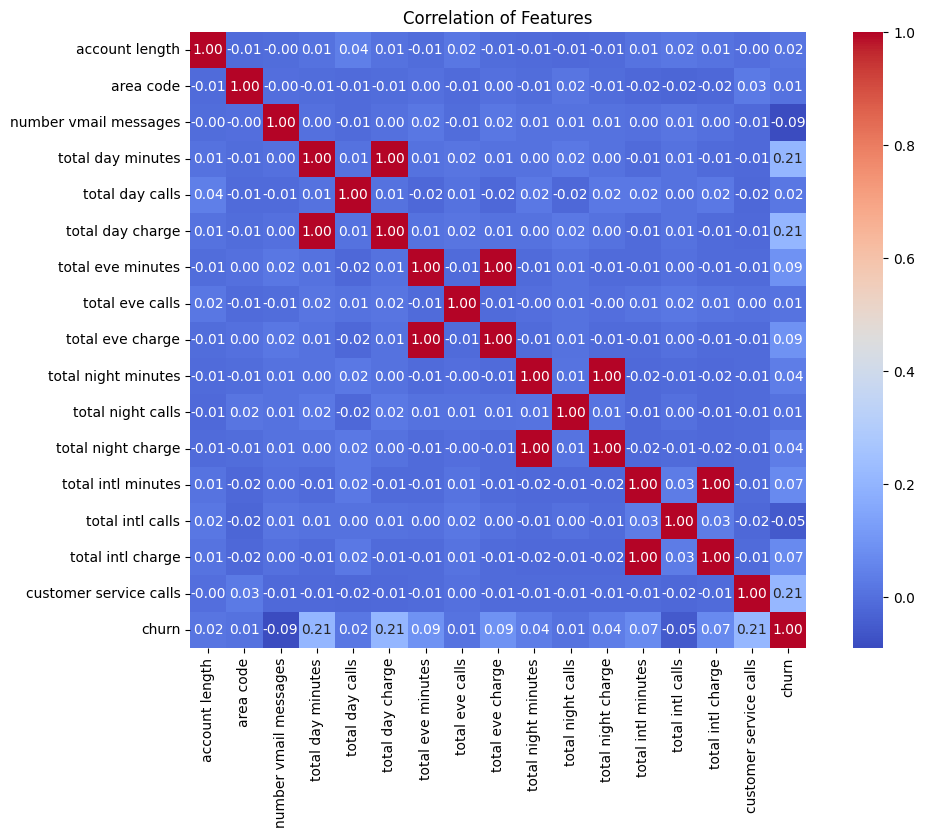

Correlation Matrix:                         account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.00

In [268]:
telecom_data = pd.read_csv('Telecom Churn.csv')
telecom_data['churn'] = telecom_data['churn'].astype("int64")

numeric_features = telecom_data.select_dtypes(include=['number'])
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation of Features')
plt.show()

print("Correlation Matrix:", correlation_matrix)

***Voice Mail and International Plan Usage by Call Duration Groups***

In [257]:
df['international plan'] = df['international plan'].map({'yes': True, 'no': False})
df['voice mail plan'] = df['voice mail plan'].map({'yes': True, 'no': False})

# def categorize_usage(minutes):
#     if minutes <= 100:
#         return 'Very Low'
#     elif minutes <= 200:
#         return 'Low'
#     elif minutes <= 300:
#         return 'Medium'
#     elif minutes <= 400:
#         return 'High'
#     else:
#         return 'Very High'

# df['Day Minutes Group'] = df['total day minutes'].apply(categorize_usage)
# df['Evening Minutes Group'] = df['total eve minutes'].apply(categorize_usage)
# df['Night Minutes Group'] = df['total night minutes'].apply(categorize_usage)
# df['Intl Minutes Group'] = df['total intl minutes'].apply(categorize_usage)


In [258]:
plan_usage_summary = df.groupby(['Day Minutes Group', 'Evening Minutes Group', 'Night Minutes Group', 'Intl Minutes Group'])[
    ['international plan', 'voice mail plan']].mean().reset_index()

melted_data = plan_usage_summary.melt(id_vars=['Day Minutes Group', 'Evening Minutes Group', 'Night Minutes Group', 'Intl Minutes Group'],
                                       var_name='Plan Type', value_name='Usage')

<ipython-input-259-efc08f1a4a6e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted_data, x='Day Minutes Group', y='Usage', hue='Plan Type', ci=None)


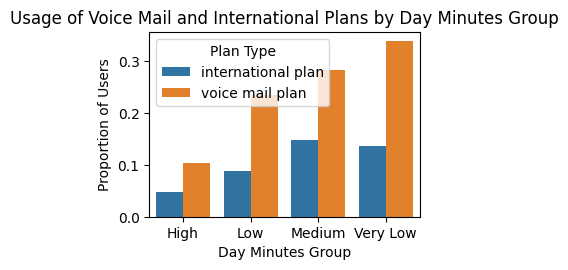

In [259]:
plt.subplot(2, 2, 3)
sns.barplot(data=melted_data, x='Day Minutes Group', y='Usage', hue='Plan Type', ci=None)
plt.title('Usage of Voice Mail and International Plans by Day Minutes Group')
plt.xlabel('Day Minutes Group')
plt.ylabel('Proportion of Users')
plt.legend(title='Plan Type')
plt.tight_layout()
plt.show()

<ipython-input-260-db3a38df3b5e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted_data, x='Evening Minutes Group', y='Usage', hue='Plan Type', ci=None)


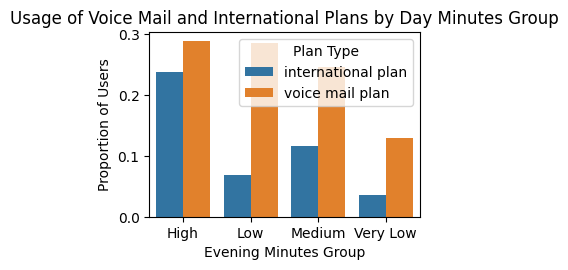

In [260]:
plt.subplot(2, 2, 3)
sns.barplot(data=melted_data, x='Evening Minutes Group', y='Usage', hue='Plan Type', ci=None)
plt.title('Usage of Voice Mail and International Plans by Day Minutes Group')
plt.xlabel('Evening Minutes Group')
plt.ylabel('Proportion of Users')
plt.legend(title='Plan Type')
plt.tight_layout()
plt.show()

<ipython-input-261-35760740ddbd>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted_data, x='Night Minutes Group', y='Usage', hue='Plan Type', ci=None)


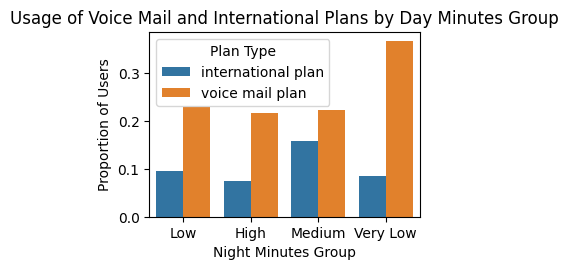

In [261]:
plt.subplot(2, 2, 3)
sns.barplot(data=melted_data, x='Night Minutes Group', y='Usage', hue='Plan Type', ci=None)
plt.title('Usage of Voice Mail and International Plans by Day Minutes Group')
plt.xlabel('Night Minutes Group')
plt.ylabel('Proportion of Users')
plt.legend(title='Plan Type')
plt.tight_layout()
plt.show()

<ipython-input-262-d53995b41922>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted_data, x='Intl Minutes Group', y='Usage', hue='Plan Type', ci=None)


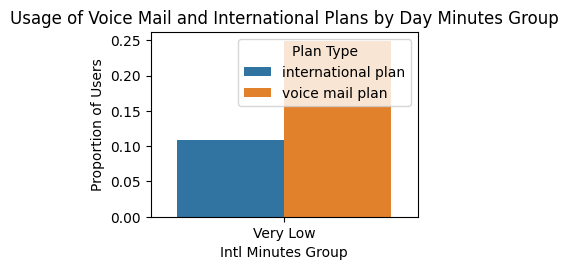

In [262]:
plt.subplot(2, 2, 3)
sns.barplot(data=melted_data, x='Intl Minutes Group', y='Usage', hue='Plan Type', ci=None)
plt.title('Usage of Voice Mail and International Plans by Day Minutes Group')
plt.xlabel('Intl Minutes Group')
plt.ylabel('Proportion of Users')
plt.legend(title='Plan Type')
plt.tight_layout()
plt.show()

***Voice Call Minutes and Text Messages Across States***

In [263]:
state_usage_summary = df.groupby('state').agg(
    total_day_minutes=('total day minutes', 'sum'),
    total_messages=('number vmail messages', 'sum')  # Replace with appropriate text messages column if available
).reset_index()

state_usage_summary = state_usage_summary.sort_values(by=['total_day_minutes', 'total_messages'], ascending=False)

print(state_usage_summary.head())

   state  total_day_minutes  total_messages
49    WV            18438.8             925
23    MN            15401.8             694
1     AL            14880.8             574
34    NY            14534.5             509
35    OH            14295.4             795


***Total Minutes by States***

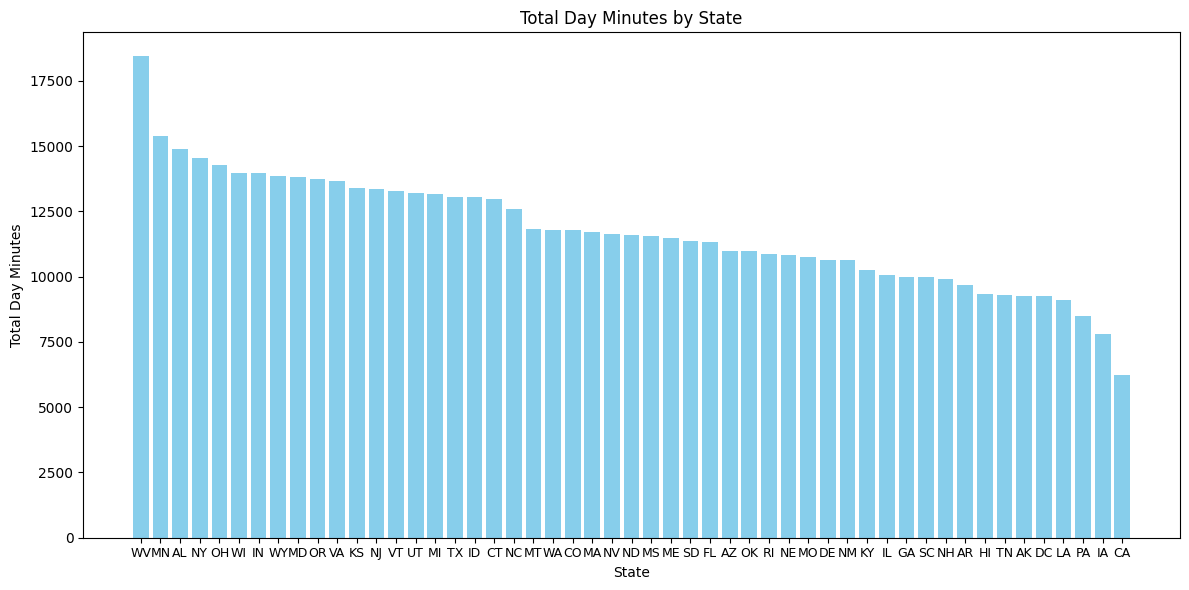

In [264]:
plt.figure(figsize=(12, 6))
plt.bar(state_usage_summary['state'], state_usage_summary['total_day_minutes'], color='skyblue')
plt.title('Total Day Minutes by State')
plt.xlabel('State')
plt.ylabel('Total Day Minutes')
plt.xticks(fontsize=9)

plt.tight_layout()
plt.show()

***Total Messages by States***

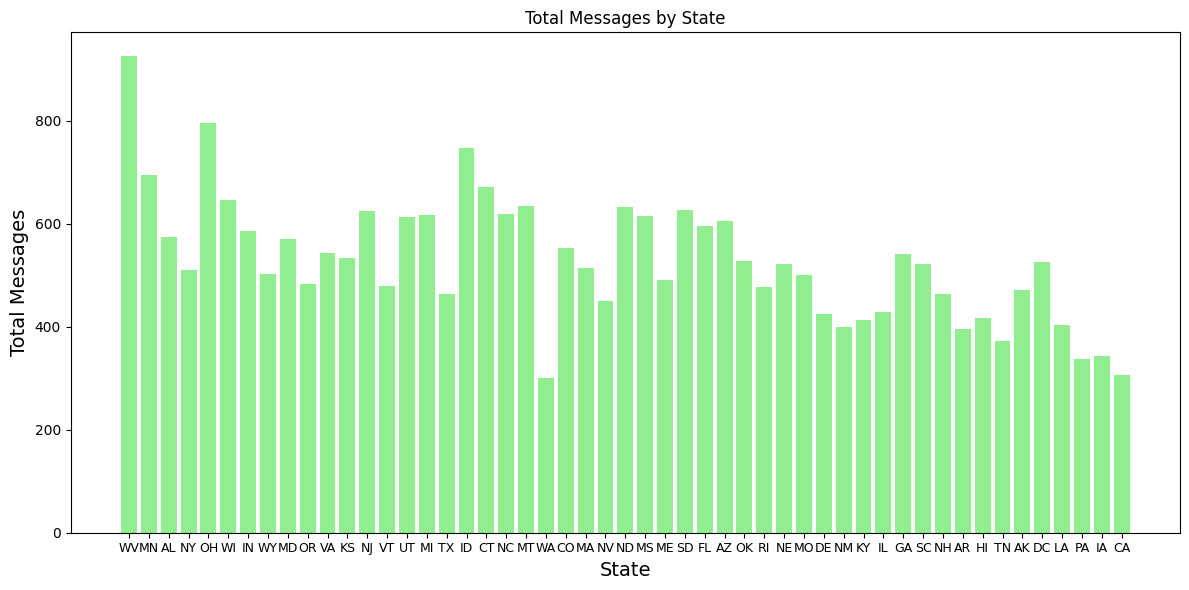

In [265]:
plt.figure(figsize=(12, 6))
plt.bar(state_usage_summary['state'], state_usage_summary['total_messages'], color='lightgreen')
plt.title('Total Messages by State')
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Messages', fontsize=14)
plt.xticks(fontsize=9)

plt.tight_layout()
plt.show()

***Telecom Spending Across States***

State with the highest spending: WV - Total Spending: $6079.48


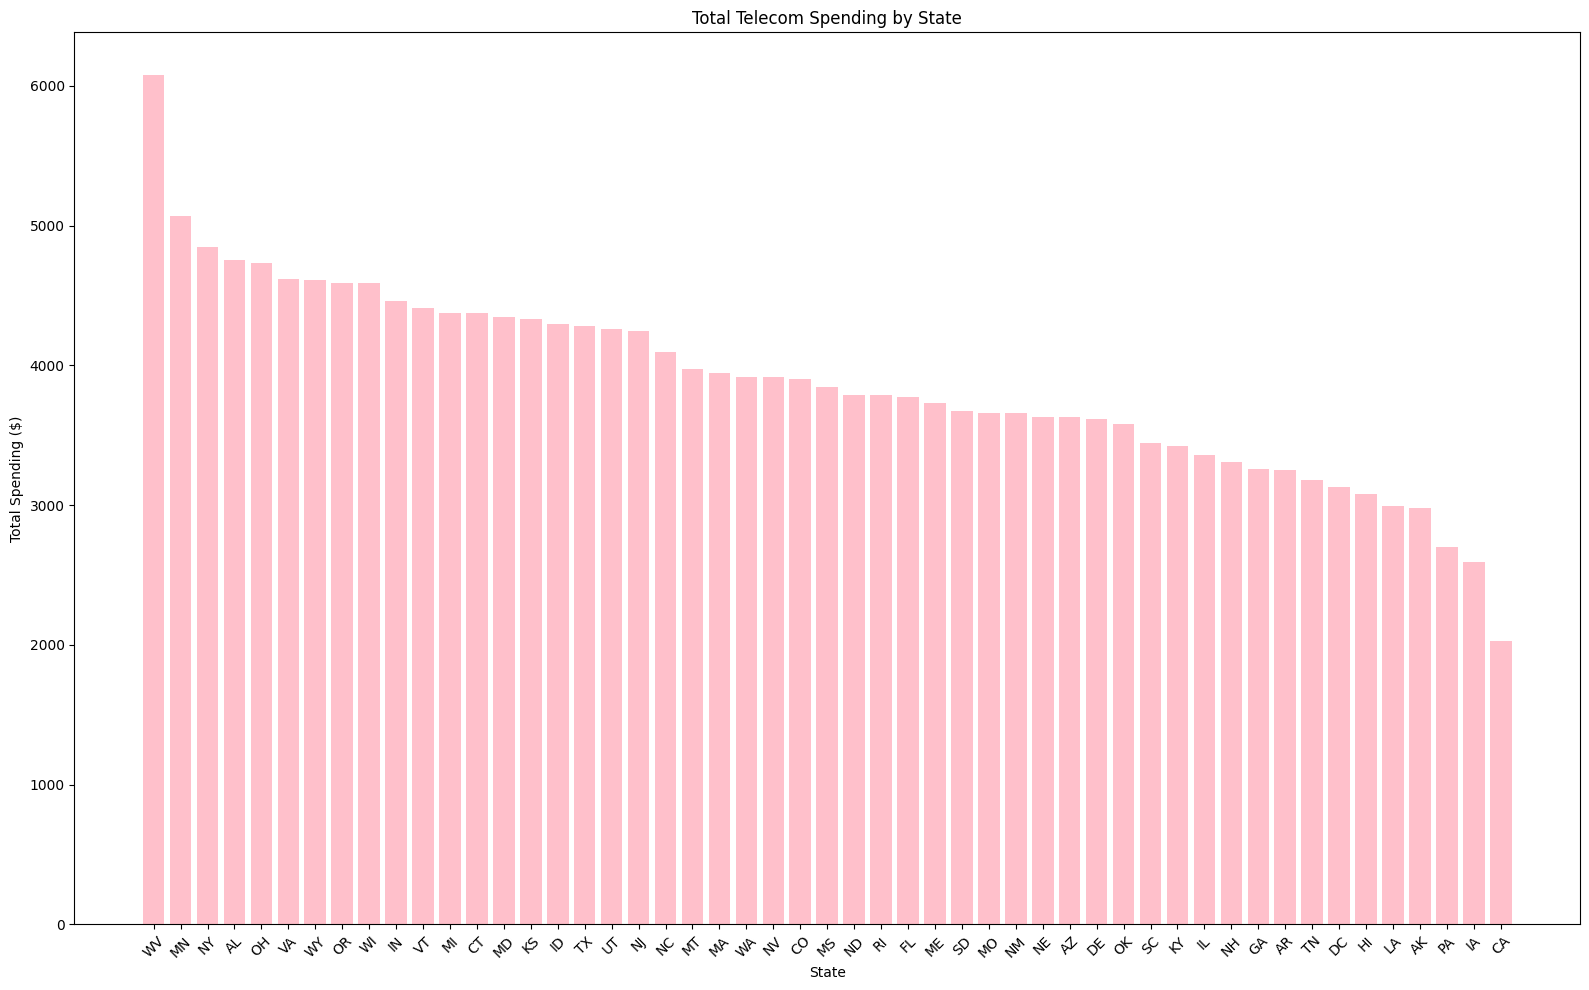

In [266]:
df['total spending'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']

state_spending_summary = df.groupby('state')['total spending'].sum().reset_index()
state_spending_summary = state_spending_summary.sort_values(by='total spending', ascending=False)

highest_spending_state = state_spending_summary.loc[state_spending_summary['total spending'].idxmax()]

print(f"State with the highest spending: {highest_spending_state['state']} - Total Spending: ${highest_spending_state['total spending']:.2f}")

plt.figure(figsize=(16, 10))
plt.bar(state_spending_summary['state'], state_spending_summary['total spending'], color='pink')
plt.title('Total Telecom Spending by State')
plt.xlabel('State')
plt.ylabel('Total Spending ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()